<a href="https://colab.research.google.com/github/shindejayesh987/Neural-Networks-Zero-to-Hero-By-Andrej-Karpathy/blob/main/makemore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
words = open("names.txt",'r').read().splitlines()

In [ ]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
len(words)

32033

In [ ]:
min(len(w) for w in words)

2

In [ ]:
max(len(w) for w in words)

15

#Bigram == working with two characters only

In [ ]:
b={}
for w in words:
  chs = ['<$>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1


In [ ]:
b

{('<$>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<$>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<$>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<$>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<$>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<$>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<$>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<$>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [ ]:
sorted(b.items(),key = lambda x: x[1])

[(('q', 'r'), 1),
 (('d', 'z'), 1),
 (('p', 'j'), 1),
 (('q', 'l'), 1),
 (('p', 'f'), 1),
 (('q', 'e'), 1),
 (('b', 'c'), 1),
 (('c', 'd'), 1),
 (('m', 'f'), 1),
 (('p', 'n'), 1),
 (('w', 'b'), 1),
 (('p', 'c'), 1),
 (('h', 'p'), 1),
 (('f', 'h'), 1),
 (('b', 'j'), 1),
 (('f', 'g'), 1),
 (('z', 'g'), 1),
 (('c', 'p'), 1),
 (('p', 'k'), 1),
 (('p', 'm'), 1),
 (('x', 'n'), 1),
 (('s', 'q'), 1),
 (('k', 'f'), 1),
 (('m', 'k'), 1),
 (('x', 'h'), 1),
 (('g', 'f'), 1),
 (('v', 'b'), 1),
 (('j', 'p'), 1),
 (('g', 'z'), 1),
 (('v', 'd'), 1),
 (('d', 'b'), 1),
 (('v', 'h'), 1),
 (('h', 'h'), 1),
 (('g', 'v'), 1),
 (('d', 'q'), 1),
 (('x', 'b'), 1),
 (('w', 'z'), 1),
 (('h', 'q'), 1),
 (('j', 'b'), 1),
 (('x', 'm'), 1),
 (('w', 'g'), 1),
 (('t', 'b'), 1),
 (('z', 'x'), 1),
 (('p', 'b'), 2),
 (('t', 'g'), 2),
 (('q', 's'), 2),
 (('t', 'x'), 2),
 (('f', 'k'), 2),
 (('b', 't'), 2),
 (('j', 'n'), 2),
 (('k', 'c'), 2),
 (('z', 'k'), 2),
 (('s', 'j'), 2),
 (('s', 'f'), 2),
 (('z', 'j'), 2),
 (('n', 'q

In [ ]:
import torch

In [ ]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['<.>'] = 0
itos = {i: s for s, i in stoi.items()}

In [ ]:
for w in words:
    chs = ['<.>'] + list(w) + ['<.>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [ ]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '<.>'}

In [ ]:
type(N)

torch.Tensor

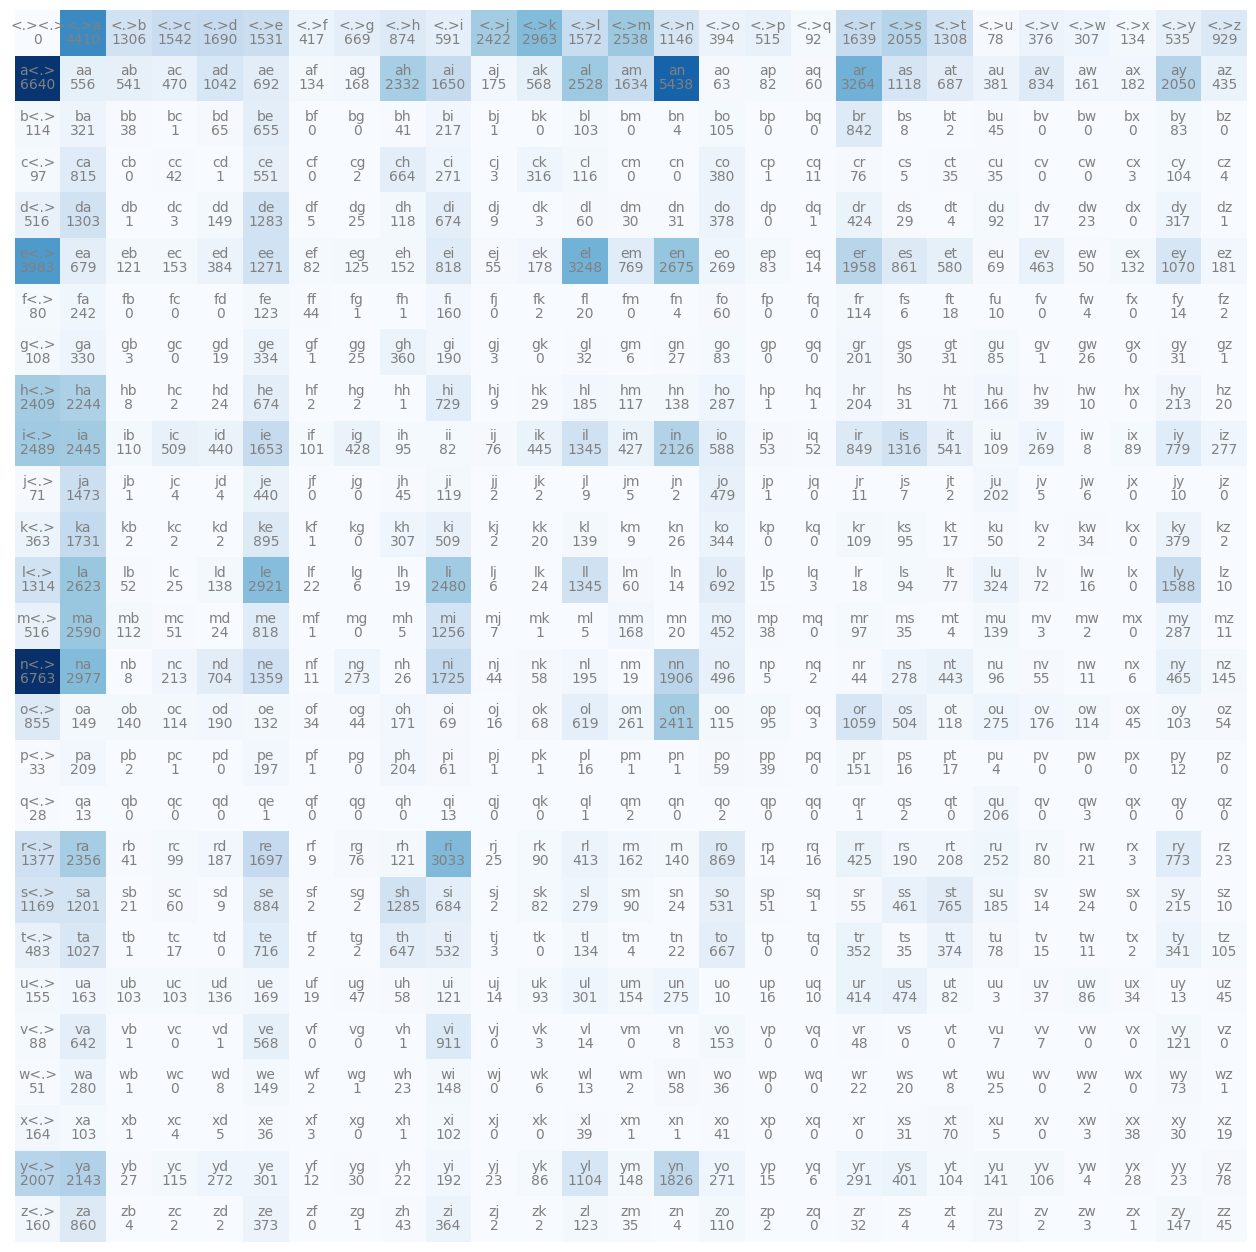

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N.numpy(), cmap='Blues')  # Convert tensor to numpy array for imshow

for i in range(0, 27):  # Loop over the valid range of itos
    for j in range(0, 27):  # Loop over the valid range of itos
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')  # Adjust index for plotting
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')  # Adjust index for plotting

plt.axis('off')
plt.show()

In [ ]:
N[0,:].shape

torch.Size([27])

In [ ]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [ ]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [ ]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [ ]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

60% prob of --> 0
30% prob of --> 1
10% prob of --> 2

we can see this below

In [ ]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [ ]:
g = torch.Generator().manual_seed(2147483647)

for i in range(3):

  out = []
  ix =0
  while True:
    p = N[ix].float()
    p = p / p.sum()
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
    print(''.join(out))

j
ju
jun
juni
junid
junide
j
ja
jan
jana
janas
janasa
janasah
p


In [ ]:
p = N.float()
p = p / p.sum()

In [ ]:
log_likelihood = 0.0
n =0
for w in words[:3]:
  chs = ['<.>'] + list(w) + ['<.>']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob= p[ix1, ix2]
    log_likelihood += torch.log(prob)
    n+=1
    print(f'{ch1}{ch2}: {prob:.4f}')
print(f"log_likelihood=" + str(log_likelihood))

nll = -log_likelihood#Negatibe log_likelyhood
print(f"nll=" + str(nll))
print(f'{nll/n}')

<.>e: 0.0067
em: 0.0034
mm: 0.0007
ma: 0.0114
a<.>: 0.0291
<.>o: 0.0017
ol: 0.0027
li: 0.0109
iv: 0.0012
vi: 0.0040
ia: 0.0107
a<.>: 0.0291
<.>a: 0.0193
av: 0.0037
va: 0.0028
a<.>: 0.0291
log_likelihood=tensor(-82.0251)
nll=tensor(82.0251)
5.126571178436279


#Neural Network Approach

In [ ]:
#create training set
xs,ys=[],[]
for w in words[:1]:
    chs = ['<.>'] + list(w) + ['<.>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1,ch2)
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)#T--> float
ys = torch.tensor(ys)#t-->int-->preferred

<.> e
e m
m m
m a
a <.>


In [ ]:
xs


tensor([ 0,  5, 13, 13,  1])

In [ ]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
#ONEHOTENCODING
import torch.nn.functional as F
xencoded = F.one_hot(xs, num_classes=27).float()
xencoded

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
xencoded.shape

torch.Size([5, 27])

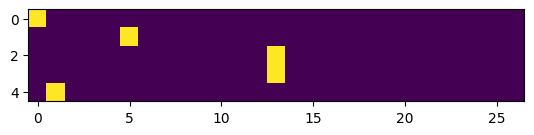

In [ ]:
plt.imshow(xencoded)

In [ ]:
xencoded.dtype

torch.float32

In [ ]:
W = torch.randn((27,27))
xencoded @ W

tensor([[-2.4978, -0.6391,  1.2153, -0.0426,  0.4762,  0.9703, -0.4765,  0.4746,
          0.1198,  0.5408, -2.3155, -1.2582,  1.5354, -1.9490, -1.4308,  0.2949,
          0.2298, -0.9044,  0.3257,  0.1726,  0.0473,  0.5845, -0.2394, -0.3930,
          0.0759,  0.4848, -1.4790],
        [-0.7788, -0.2181,  0.4349, -0.2035, -0.6616,  0.3532, -1.1542,  0.3096,
         -0.0075,  0.3960,  0.7115, -1.2150, -0.4519,  0.0520,  0.0961,  0.4461,
         -1.9117,  1.6576, -0.5923, -1.0467,  1.1130, -0.1696,  1.4847, -0.8154,
         -0.8914, -0.5828, -0.6312],
        [-0.7909, -0.3273, -0.3961, -1.3654,  0.5208, -0.2727, -2.5545,  0.4266,
         -1.1304, -1.4442, -0.5118, -0.6014, -0.6246,  0.0874, -0.0194,  1.1403,
         -0.2611,  0.5032, -1.2541, -0.0799,  1.4250,  1.3777, -0.6919, -0.4328,
         -0.5416,  2.0373,  0.6583],
        [-0.7909, -0.3273, -0.3961, -1.3654,  0.5208, -0.2727, -2.5545,  0.4266,
         -1.1304, -1.4442, -0.5118, -0.6014, -0.6246,  0.0874, -0.0194,  1.1403

In [ ]:
xencoded[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
W[:,13]

tensor([-1.9490,  0.6151,  2.0758, -1.2598,  2.0686,  0.0520, -1.3932, -0.6412,
         0.8930, -0.9909, -2.0085,  0.0490, -0.7205,  0.0874, -0.0643, -1.6262,
        -1.9071, -0.8502, -1.2880, -0.0083, -0.4699, -1.1984,  0.5572, -0.5869,
         1.0436,  0.6307, -0.1466])

In [ ]:
(xencoded[3] @ W[:,13]).sum()

tensor(0.0874)

In [ ]:
(xencoded @ W)[3,13]

tensor(0.0874)

In [ ]:
logits = xencoded @ W #log-counts
counts = logits.exp()
probs = logits / counts.sum(1, keepdims=True)
probs

tensor([[-0.0769, -0.0197,  0.0374, -0.0013,  0.0147,  0.0299, -0.0147,  0.0146,
          0.0037,  0.0166, -0.0713, -0.0387,  0.0473, -0.0600, -0.0440,  0.0091,
          0.0071, -0.0278,  0.0100,  0.0053,  0.0015,  0.0180, -0.0074, -0.0121,
          0.0023,  0.0149, -0.0455],
        [-0.0236, -0.0066,  0.0132, -0.0062, -0.0201,  0.0107, -0.0350,  0.0094,
         -0.0002,  0.0120,  0.0216, -0.0369, -0.0137,  0.0016,  0.0029,  0.0135,
         -0.0580,  0.0503, -0.0180, -0.0318,  0.0338, -0.0051,  0.0451, -0.0247,
         -0.0271, -0.0177, -0.0192],
        [-0.0216, -0.0089, -0.0108, -0.0372,  0.0142, -0.0074, -0.0696,  0.0116,
         -0.0308, -0.0394, -0.0140, -0.0164, -0.0170,  0.0024, -0.0005,  0.0311,
         -0.0071,  0.0137, -0.0342, -0.0022,  0.0388,  0.0376, -0.0189, -0.0118,
         -0.0148,  0.0555,  0.0179],
        [-0.0216, -0.0089, -0.0108, -0.0372,  0.0142, -0.0074, -0.0696,  0.0116,
         -0.0308, -0.0394, -0.0140, -0.0164, -0.0170,  0.0024, -0.0005,  0.0311

In [ ]:
probs[0].shape

torch.Size([27])

In [ ]:
probs[4].sum()

tensor(0.1287)

In [ ]:
g = torch.Generator().manual_seed(2147483647 + 10)
W = torch.randn((27,27), generator=g)

In [ ]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W
counts = logits.exp()
probs = logits / counts.sum(1, keepdims=True)
probs

tensor([[-0.0256,  0.0033,  0.0386, -0.0381,  0.0058, -0.0242, -0.0095, -0.0340,
         -0.0506, -0.0144, -0.0154,  0.0078,  0.0199,  0.0027,  0.0058, -0.0197,
          0.0136, -0.0203,  0.0481, -0.0127,  0.0002, -0.0193, -0.0277,  0.0186,
          0.0499, -0.0109,  0.0068],
        [-0.0522, -0.0139, -0.0140,  0.0291, -0.0101,  0.0184, -0.0144,  0.0191,
         -0.0325,  0.0544, -0.0433,  0.0009,  0.0316,  0.0127, -0.0101, -0.0015,
         -0.0350, -0.0128, -0.0243,  0.0303, -0.0275,  0.0242, -0.0520, -0.0026,
          0.0197, -0.0078, -0.0045],
        [ 0.0145,  0.0295,  0.0138,  0.0215,  0.0153,  0.0336, -0.0263,  0.0243,
         -0.0262,  0.0404, -0.0484, -0.0329, -0.0013, -0.0102, -0.0527, -0.0478,
         -0.0371, -0.0359, -0.0281,  0.0038,  0.0080,  0.0251, -0.0260,  0.0391,
         -0.0789, -0.0375, -0.0371],
        [ 0.0145,  0.0295,  0.0138,  0.0215,  0.0153,  0.0336, -0.0263,  0.0243,
         -0.0262,  0.0404, -0.0484, -0.0329, -0.0013, -0.0102, -0.0527, -0.0478

In [ ]:
probs.shape

torch.Size([5, 27])

In [ ]:
probs.dtype

torch.float32

In [ ]:
probs[0].sum()

tensor(-0.1012)

In [ ]:
nlls = torch.zeros(5)
for i in range(5):
  x = xs[i].item()
  y = ys[i].item()
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the neural net to the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

  print('===')
  print('average negative log likelihood:', nlls.mean().item())

--------
bigram example 1: <.>e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([-0.0256,  0.0033,  0.0386, -0.0381,  0.0058, -0.0242, -0.0095, -0.0340,
        -0.0506, -0.0144, -0.0154,  0.0078,  0.0199,  0.0027,  0.0058, -0.0197,
         0.0136, -0.0203,  0.0481, -0.0127,  0.0002, -0.0193, -0.0277,  0.0186,
         0.0499, -0.0109,  0.0068])
label (actual next character): 5
probability assigned by the neural net to the correct character: -0.02420203946530819
log likelihood: nan
negative log likelihood: nan
===
average negative log likelihood: nan
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([-0.0522, -0.0139, -0.0140,  0.0291, -0.0101,  0.0184, -0.0144,  0.0191,
        -0.0325,  0.0544, -0.0433,  0.0009,  0.0316,  0.0127, -0.0101, -0.0015,
        -0.0350, -0.0128, -0.0243,  0.0303, -0.0275,  0.0242, -0.0520, -0.0026,
         0.0197, -0.0078, -0.0045])
label (act